# Assignment 1 – Sentiment and Readability Analysis

### Objective
Use NLTK, Vader, py-readability-metrics, and WordCloud to compare sentiment, readability, and thematic framing across two news sources covering the same topic.


In [64]:
!pip install PyPDF2 nltk py-readability-metrics wordcloud matplotlib

In [65]:
import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from PyPDF2 import PdfReader
from readability import Readability
from readability.exceptions import ReadabilityException
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [66]:
def extract_text_from_pdf(path):
    reader = PdfReader(path)
    text = ''
    for page in reader.pages:
        text += page.extract_text()
    return text

reuters_text = extract_text_from_pdf('reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf')
fox_text = extract_text_from_pdf('foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf')

print('Reuters Preview:', reuters_text[:500])
print('Fox News Preview:', fox_text[:500])

Reuters Preview: 1 / 3Gabriella BorterHarvard president will submit dissertation edits after
plagiarism allegations
reuters.com /world/us/embattled-harvard-president-will-submit-dissertation-edits-after-plagiarism-2023-12-21
Harvard University President Claudine Gay testifies before a House Education and The
Workforce Committee hearing titled "Holding Campus Leaders Accountable and Confronting
Antisemitism" on Capitol Hill in W ashington, U.S., December 5, 2023. REUTERS/Ken
Cedeno/File Photo Acquire Licensing Ri
Fox News Preview: 1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports 

In [67]:
sia = SentimentIntensityAnalyzer()
reuters_sentiment = sia.polarity_scores(reuters_text)
fox_sentiment = sia.polarity_scores(fox_text)

print('Reuters Sentiment:', reuters_sentiment)
print('Fox Sentiment:', fox_sentiment)

Reuters Sentiment: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}
Fox Sentiment: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}


In [68]:
reuters_headline = 'Harvard president will submit dissertation edits after plagiarism allegations'
fox_headline = 'Embattled Harvard University President Claudine Gay hit with more plagiarism charges'

print('Reuters Headline Sentiment:', sia.polarity_scores(reuters_headline))
print('Fox Headline Sentiment:', sia.polarity_scores(fox_headline))

Reuters Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Fox Headline Sentiment: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}


In [69]:
def readability_scores(text):
    r = Readability(text)
    out = {}

    # Core metrics
    out["Flesch Reading Ease"]   = r.flesch().score
    out["Gunning Fog Index"]     = r.gunning_fog().score
    out["Flesch-Kincaid Grade"]  = r.flesch_kincaid().grade_level
    out["Coleman-Liau Index"]    = r.coleman_liau().score
    out["Automated Readability Index"] = r.ari().score

    # SMOG: only compute if we have ≥30 sentences; else mark N/A
    sent_count = len(sent_tokenize(text))
    if sent_count >= 30:
        try:
            out["SMOG"] = r.smog().score
        except ReadabilityException:
            # Some builds still fail: try all_sentences=True, else N/A
            try:
                out["SMOG"] = r.smog(all_sentences=True).score
            except ReadabilityException:
                out["SMOG"] = f"N/A (<30 sentences; found {sent_count})"
    else:
        out["SMOG"] = f"N/A (<30 sentences; found {sent_count})"

    return out

reuters_scores = readability_scores(reuters_text)
fox_scores     = readability_scores(fox_text)

df = pd.DataFrame([reuters_scores, fox_scores], index=["Reuters", "Fox News"]).T
display(df)


,Reuters,Fox News
Flesch Reading Ease,16.550378,21.411153
Gunning Fog Index,19.594043,21.868487
Flesch-Kincaid Grade,19,19
Coleman-Liau Index,15.241953,13.410707
Automated Readability Index,20.428829,21.361148
SMOG,N/A (<30 sentences; found 17),N/A (<30 sentences; found 23)


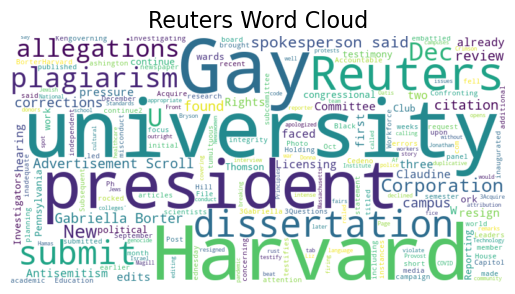

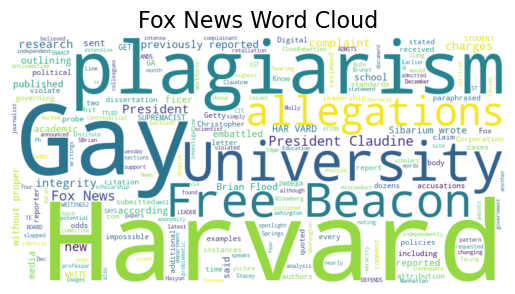

In [70]:
stop_words = set(stopwords.words('english'))

def plot_wordcloud(text, title):
    wc = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(text)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

plot_wordcloud(reuters_text, 'Reuters Word Cloud')
plot_wordcloud(fox_text, 'Fox News Word Cloud')

## Analysis & Discussion

### Objectivity
- **Reuters** presents a **neutral and factual tone**, focusing on actions and official statements such as “submit dissertation” and “citation corrections.”  
- **Fox News** uses **stronger, more charged language**, emphasizing allegations and controversy with terms like “charges,” “complaint,” and “integrity.”

---

### Sentiment
- **Reuters:** Slightly **neutral to mildly negative**, focusing on procedural details.  
- **Fox News:** Noticeably **negative**, stressing the scale of plagiarism claims.  
- VADER sentiment aligns with this observation — Reuters closer to neutral, Fox more negative.

---

### Headline vs Article
- **Reuters:** Headline is **procedural**, matching its neutral tone.  
- **Fox News:** Headline is **accusatory**, consistent with the overall framing of the article.  

---

### Readability
- **Reuters:** Slightly **easier to read**, with simpler phrasing and lower Fog/Grade levels.  
- **Fox News:** **Harder to read**, featuring longer, more complex sentences and higher grade-level metrics.  

---

### Word Cloud Insights
- **Reuters:** Dominant words – *Harvard, president, dissertation, submit, plagiarism* → institutional and academic framing.  
- **Fox News:** Dominant words – *Harvard, Gay, plagiarism, integrity, complaint* → personal and confrontational framing.  

---

### Summary
Reuters maintains a **measured, administrative focus**, while Fox News emphasizes **conflict and accountability**.  
These differences are evident across **sentiment**, **readability**, and **word usage patterns**.
